## 电信号DNA测序

In [1]:
import pyabf
import pyabf.filter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

#### 已知数据
序列A

PAAAAAAACCTTCCXTTTTCCCGTCCGCTCGTTCGCGCCTGTCTGCTTGTTTGCGTGTGCCGGTCGGCTAAGCATTCTCATGCAGGTCGTAGCC

长度是94

序列B

PAAAAAAACCTTCCXTGTTTGCGTGTGCCGGTCGGCTGGTTGGCGGGTGGGCCCATCAAAACACTCATAAGCATTCTCATGCAGGTCGTAGCC

长度是93

测得序列
|  序列 | 时长  |
|---|---|
| abf_A1 | 8.90 |
| abf_A2 | 10.63 |
| abf_A3 | 3.37 |
| abf_A4 | 3.30 |
| abf_A5 | 9.64 |
| abf_B1 | 8.41 |
| abf_B2 | 6.78 |

In [2]:
seq_A='PAAAAAAACCTTCCXTTTTCCCGTCCGCTCGTTCGCGCCTGTCTGCTTGTTTGCGTGTGCCGGTCGGCTAAGCATTCTCATGCAGGTCGTAGCC'
seq_B='PAAAAAAACCTTCCXTGTTTGCGTGTGCCGGTCGGCTGGTTGGCGGGTGGGCCCATCAAAACACTCATAAGCATTCTCATGCAGGTCGTAGCC'

ref_seqs_map = {
    "AAAA": 45.8,
    "AAAC": 42.1,
    "AAAG": 47.5,
    "AAAT": 46.4,
    "AACA": 46.4,
    "AACC": 39.3,
    "AACG": 41.6,
    "AACT": 39.7,
    "AAGA": 47.5,
    "AAGC": 41.5,
    "AAGG": 45.2,
    "AAGT": 44.4,
    "AATA": 40.2,
    "AATC": 35.2,
    "AATG": 39.4,
    "AATT": 36.7,
    "ACAA": 46.4,
    "ACAC": 43.4,
    "ACAG": 44.7,
    "ACAT": 45.2,
    "ACCA": 42.7,
    "ACCC": 40.7,
    "ACCG": 46.3,
    "ACCT": 41.5,
    "ACGA": 46.6,
    "ACGC": 39.7,
    "ACGG": 44.5,
    "ACGT": 42.3,
    "ACTA": 41.9,
    "ACTC": 37.4,
    "ACTG": 40.1,
    "ACTT": 36.1,
    "AGAA": 56.3,
    "AGAC": 45.0,
    "AGAG": 54.1,
    "AGAT": 47.7,
    "AGCA": 49.1,
    "AGCC": 41.8,
    "AGCG": 51.7,
    "AGCT": 44.0,
    "AGGA": 47.9,
    "AGGC": 38.3,
    "AGGG": 41.8,
    "AGGT": 37.4,
    "AGTA": 31.5,
    "AGTC": 24.3,
    "AGTG": 34.6,
    "AGTT": 27.3,
    "ATAA": 44.6,
    "ATAC": 42.5,
    "ATAG": 42.0,
    "ATAT": 42.8,
    "ATCA": 37.2,
    "ATCC": 35.3,
    "ATCG": 39.8,
    "ATCT": 37.4,
    "ATGA": 36.4,
    "ATGC": 30.7,
    "ATGG": 36.0,
    "ATGT": 33.0,
    "ATTA": 31.6,
    "ATTC": 26.4,
    "ATTG": 31.4,
    "CAAA": 46.4,
    "CAAC": 43.5,
    "CAAG": 47.5,
    "CAAT": 43.2,
    "CACA": 47.1,
    "CACC": 40.6,
    "CACG": 39.7,
    "CACT": 41.1,
    "CAGA": 47.7,
    "CAGC": 37.0,
    "CAGG": 42.9,
    "CAGT": 37.4,
    "CATA": 42.8,
    "CATC": 35.3,
    "CATG": 38.9,
    "CATT": 31.4,
    "CCAA": 45.3,
    "CCAC": 42.7,
    "CCAG": 43.7,
    "CCAT": 43.3,
    "CCCA": 46.3,
    "CCCC": 42.6,
    "CCCG": 43.0,
    "CCCT": 37.8,
    "CCGA": 46.3,
    "CCGC": 40.7,
    "CCGG": 43.2,
    "CCGT": 38.0,
    "CCTA": 43.9,
    "CCTC": 37.8,
    "CCTG": 34.1,
    "CCTT": 32.8,
    "CGAA": 51.3,
    "CGAC": 42.4,
    "CGAG": 46.4,
    "CGAT": 44.4,
    "CGCA": 47.8,
    "CGCC": 40.2,
    "CGCG": 43.1,
    "CGCT": 40.7,
    "CGGA": 40.7,
    "CGGC": 33.5,
    "CGGG": 36.2,
    "CGGT": 31.6,
    "CGTA": 27.0,
    "CGTC": 16.8,
    "CGTG": 21.8,
    "CGTT": 17.7,
    "CTAA": 47.3,
    "CTAC": 40.4,
    "CTAG": 44.8,
    "CTAT": 37.0,
    "CTCA": 44.1,
    "CTCC": 37.5,
    "CTCG": 35.7,
    "CTCT": 38.6,
    "CTGA": 34.3,
    "CTGC": 27.5,
    "CTGG": 34.1,
    "CTGT": 24.5,
    "CTTA": 31.2,
    "CTTC": 22.1,
    "CTTG": 27.4,
    "CTTT": 24.0,
    "GAAA": 56.3,
    "GAAC": 44.6,
    "GAAG": 48.7,
    "GAAT": 48.6,
    "GACA": 45.8,
    "GACC": 38.7,
    "GACG": 42.2,
    "GACT": 39.7,
    "GAGA": 47.4,
    "GAGC": 43.3,
    "GAGG": 43.4,
    "GAGT": 45.4,
    "GATA": 41.0,
    "GATC": 33.9,
    "GATG": 39.4,
    "GATT": 35.6,
    "GCAA": 49.1,
    "GCAC": 38.7,
    "GCAG": 48.0,
    "GCAT": 38.9,
    "GCCA": 44.4,
    "GCCC": 41.5,
    "GCCG": 43.2,
    "GCCT": 41.3,
    "GCGA": 47.2,
    "GCGC": 38.6,
    "GCGG": 45.6,
    "GCGT": 37.2,
    "GCTA": 36.8,
    "GCTC": 33.7,
    "GCTG": 36.0,
    "GCTT": 31.6,
    "GGAA": 51.8,
    "GGAC": 41.8,
    "GGAG": 46.7,
    "GGAT": 44.1,
    "GGCA": 43.7,
    "GGCC": 40.0,
    "GGCG": 42.3,
    "GGCT": 37.9,
    "GGGA": 41.8,
    "GGGC": 31.3,
    "GGGG": 30.2,
    "GGGT": 30.7,
    "GGTA": 28.0,
    "GGTC": 17.8,
    "GGTG": 25.5,
    "GGTT": 20.3,
    "GTAA": 40.3,
    "GTAC": 38.5,
    "GTAG": 38.0,
    "GTAT": 37.4,
    "GTCA": 35.7,
    "GTCC": 27.4,
    "GTCG": 30.6,
    "GTCT": 28.5,
    "GTGA": 33.5,
    "GTGC": 24.4,
    "GTGG": 22.9,
    "GTGT": 26.9,
    "GTTA": 29.5,
    "GTTC": 21.2,
    "GTTG": 27.5,
    "GTTT": 22.2,
    "TAAA": 44.6,
    "TAAC": 42.5,
    "TAAG": 47.6,
    "TAAT": 50.5,
    "TACA": 44.4,
    "TACC": 42.5,
    "TACG": 42.3,
    "TACT": 43.2,
    "TAGA": 45.8,
    "TAGC": 41.3,
    "TAGG": 44.0,
    "TAGT": 41.8,
    "TATA": 40.7,
    "TATC": 36.1,
    "TATG": 37.9,
    "TATT": 35.0,
    "TCAA": 43.7,
    "TCAC": 39.7,
    "TCAG": 46.3,
    "TCAT": 48.1,
    "TCCA": 43.7,
    "TCCC": 38.6,
    "TCCG": 39.3,
    "TCCT": 41.2,
    "TCGA": 46.4,
    "TCGC": 40.4,
    "TCGG": 40.0,
    "TCGT": 37.9,
    "TCTA": 42.1,
    "TCTC": 34.6,
    "TCTG": 32.8,
    "TCTT": 32.4,
    "TGAA": 45.6,
    "TGAC": 38.5,
    "TGAG": 42.4,
    "TGAT": 43.3,
    "TGCA": 42.8,
    "TGCC": 35.4,
    "TGCG": 40.6,
    "TGCT": 37.3,
    "TGGA": 38.7,
    "TGGC": 32.1,
    "TGGG": 33.7,
    "TGGT": 27.1,
    "TGTA": 27.1,
    "TGTC": 17.6,
    "TGTG": 21.7,
    "TGTT": 18.8,
    "TTAA": 40.1,
    "TTAC": 35.6,
    "TTAG": 41.8,
    "TTAT": 40.6,
    "TTCA": 36.0,
    "TTCC": 28.7,
    "TTCG": 33.2,
    "TTCT": 32.4,
    "TTGA": 33.1,
    "TTGC": 27.3,
    "TTGG": 32.1,
    "TTGT": 28.8,
    "TTTA": 29.2,
    "TTTC": 22.2,
    "TTTG": 25.9,
    "TTTT": 22.2,
}

In [20]:
abf_A1 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_11_0000.abf")
abf_A2 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_11_0002.abf")
abf_A3 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_12_0001.abf")
abf_A4 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_15_0001.abf")
abf_A5 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_18_0000.abf")

abf_B1 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_19_0001.abf")
abf_B2 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_19_0002.abf")

In [21]:
r= abf_A2.sweepX

In [4]:
def get_df_seq(seq):
    quadromers = [seq[i:i+4] for i in range(len(seq) - 3)]
    quadromer_values = []
    for quadromer in quadromers:
        if quadromer in ref_seqs_map:
            quadromer_values.append(ref_seqs_map[quadromer])
        else:
            quadromer_values.append(0)  # 或者你可以选择一个默认值
    df_seq = pd.DataFrame({'Quadromers': quadromers, 'Values': quadromer_values})
    return df_seq

In [5]:
df_seq_A=get_df_seq(seq_A)
df_seq_A

,Quadromers,Values
0,PAAA,0.0
1,AAAA,45.8
2,AAAA,45.8
3,AAAA,45.8
4,AAAA,45.8
...,...,...
86,TCGT,37.9
87,CGTA,27.0
88,GTAG,38.0
89,TAGC,41.3


In [6]:
# preprocess
# 采样频率 500kHz
# 滤波 100kHz
# Downsample to 5 kHz
def preprocess(abf,filter=True,SIGMA=0.01,DOWNSP_RATE=100):
    if filter:
        pyabf.filter.gaussian(abf, 0)  # remove old filter
        pyabf.filter.gaussian(abf, SIGMA)  # apply new filter
    abf.setSweep(0)

    if len(abf.sweepY) % DOWNSP_RATE != 0:
        abf.sweepY = abf.sweepY[:-(len(abf.sweepY) % DOWNSP_RATE)]
        abf.sweepX = abf.sweepX[:-(len(abf.sweepX) % DOWNSP_RATE)]

    abf.sweepY=np.mean(abf.sweepY.reshape(-1, DOWNSP_RATE), axis=1)
    abf.sweepX=np.mean(abf.sweepX.reshape(-1, DOWNSP_RATE), axis=1)
    return abf

In [7]:
def plot_abf(abf,start_index=None,end_index=None,title_prefix=""):
    reduction_rate = 5000
    if end_index is None:
        fig = plt.figure(figsize=(50, 5))
        duration = len(abf.sweepY)/reduction_rate/60
        sweepY=abf.sweepY
        sweepX=abf.sweepX
        plt.title("DNA seqencing %s, total %.2f minutes" % (title_prefix, duration))
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.step(sweepX, sweepY, alpha=.75,where='post') 
        return fig
    else:
        start_index = int(start_index*reduction_rate)
        end_index = int(end_index*reduction_rate)
        duration = len(abf.sweepY)/reduction_rate/60
        fig = plt.figure(figsize=(50, 5))
        sweepY=abf.sweepY[start_index:end_index]
        sweepX=abf.sweepX[start_index:end_index]
        plt.title("DNA seqencing %s during %.2fs to %.2fs, total %.2f minutes" % (title_prefix, start_index/reduction_rate, end_index/reduction_rate,duration))
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.step(sweepX, sweepY, alpha=.75,where='post') 
        return fig

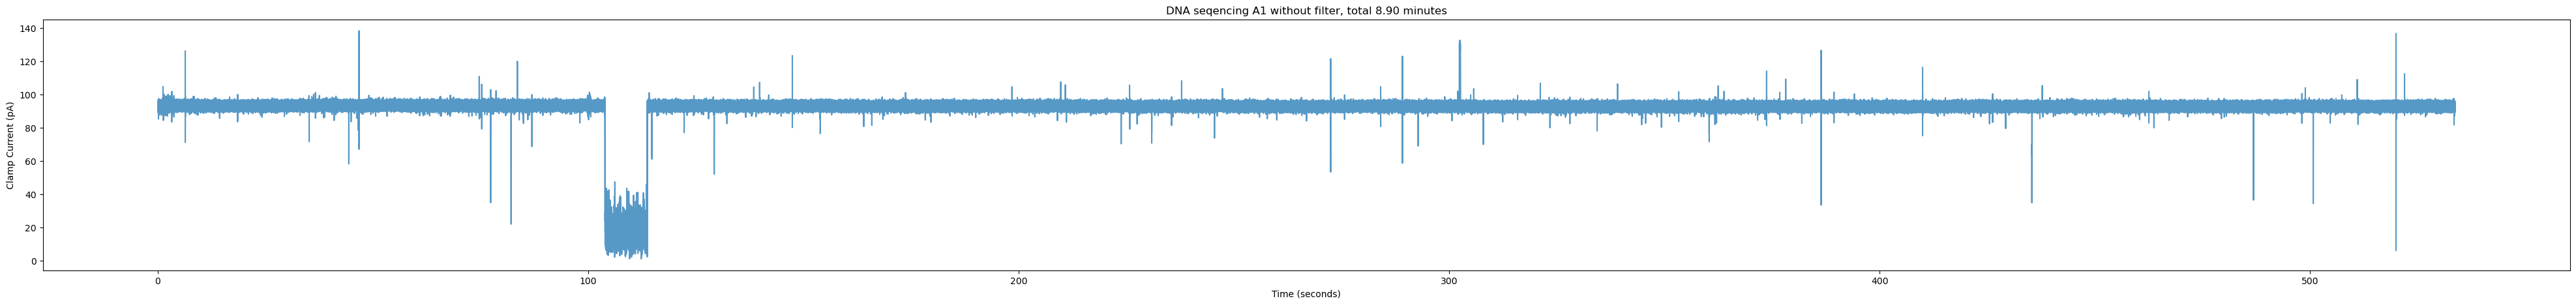

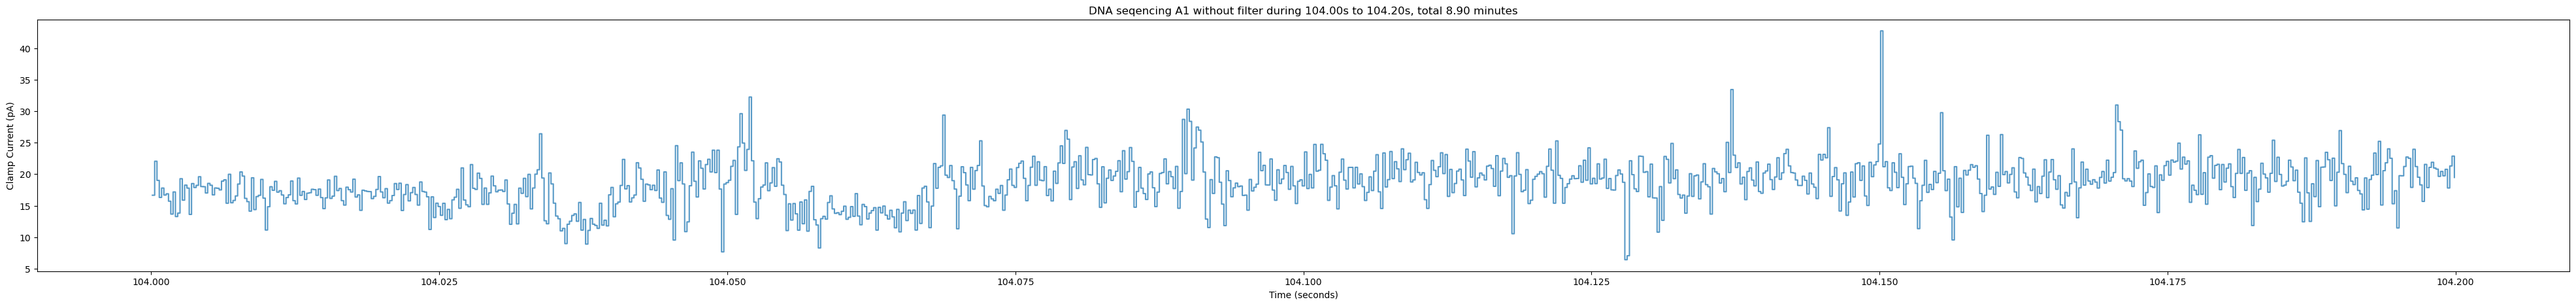

In [8]:
# A1
abf = preprocess(abf_A1,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="A1 without filter")
fig = plot_abf(abf,104,104.2,title_prefix="A1 without filter")
# for sigma in [0.1,0.5,1]:
#     abf = preprocess(abf_A1,SIGMA=sigma)
#     fig = plot_abf(abf,104,104.2,title_prefix="A1 with filter para=%s"%(sigma))

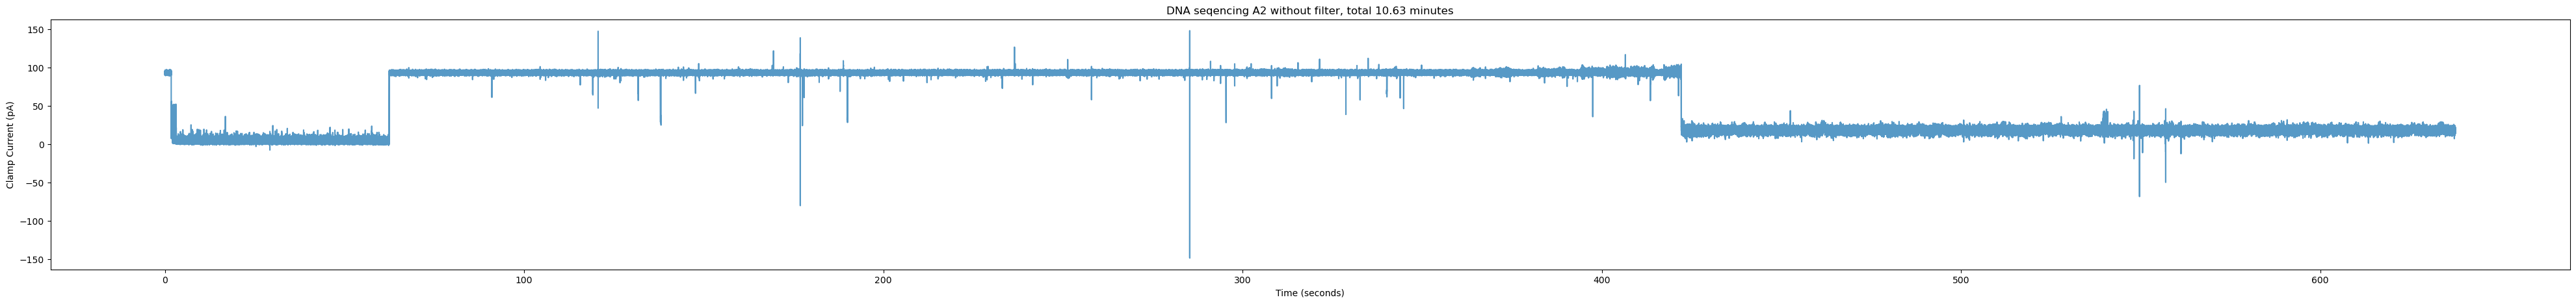

In [15]:
# A2
abf = preprocess(abf_A2,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="A2 without filter")

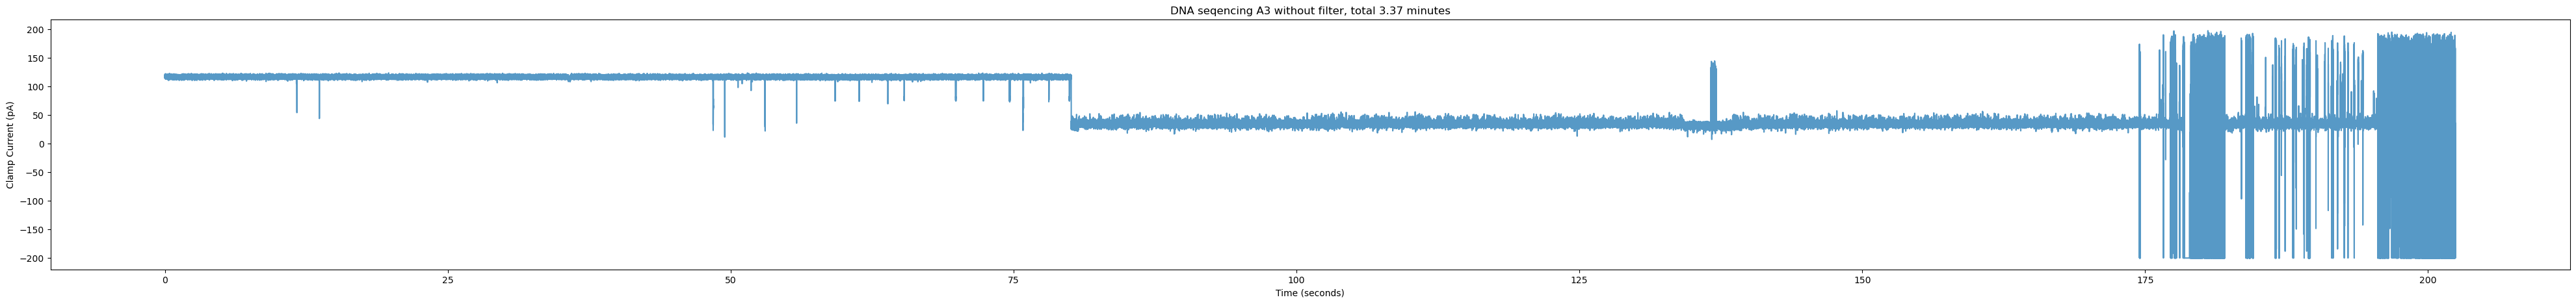

In [10]:
# A3
abf = preprocess(abf_A3,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="A3 without filter")

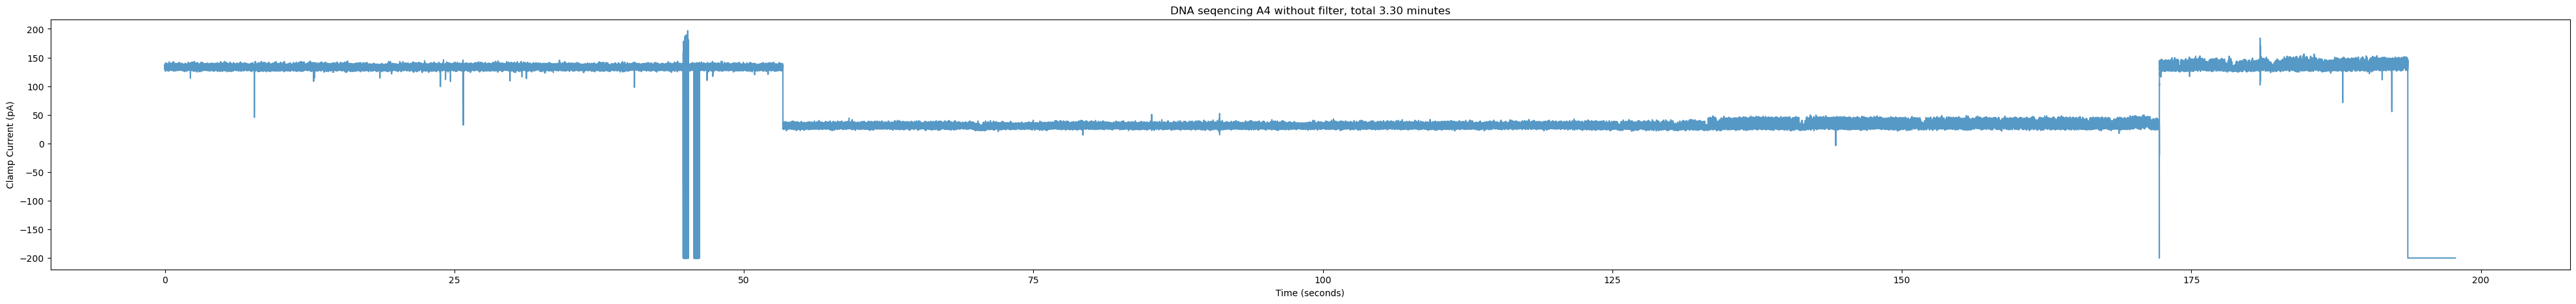

In [11]:
# A4
abf = preprocess(abf_A4,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="A4 without filter")

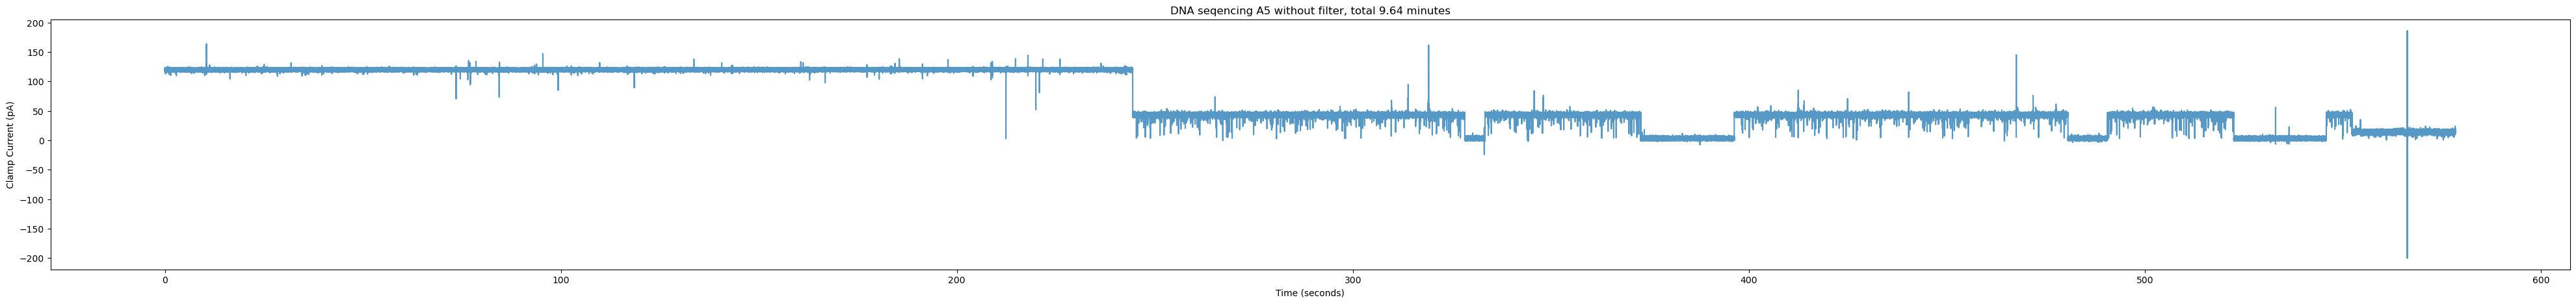

In [12]:
# A5
abf = preprocess(abf_A5,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="A5 without filter")

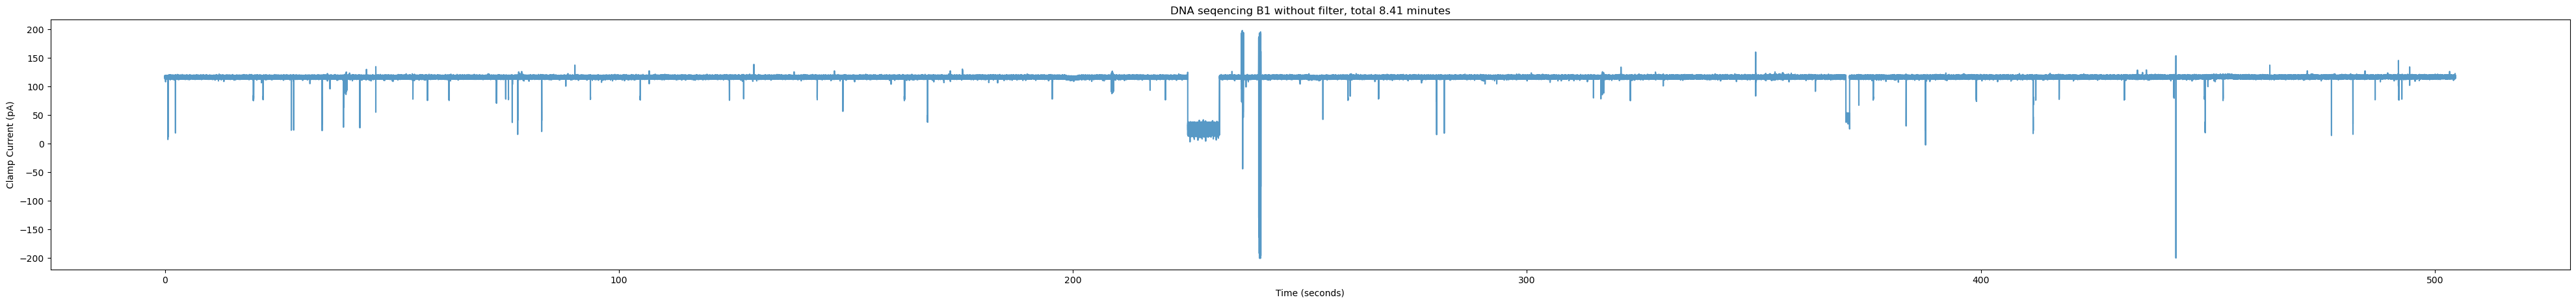

In [13]:
# B1
abf = preprocess(abf_B1,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="B1 without filter")

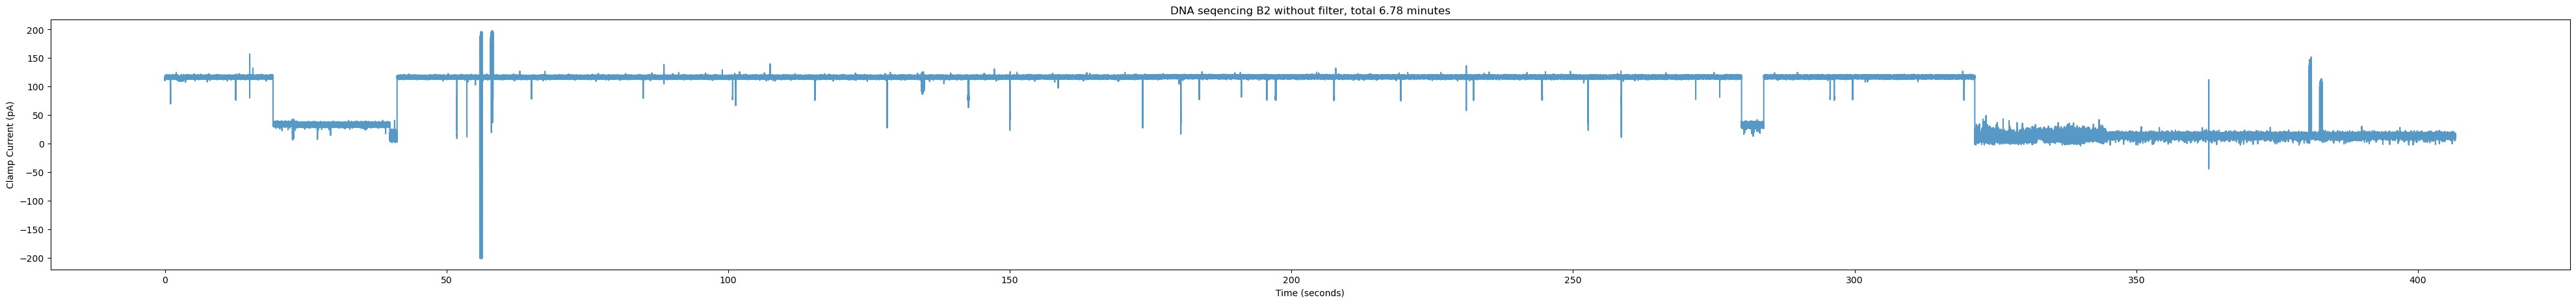

In [14]:
# B2
abf = preprocess(abf_B2,filter=False,DOWNSP_RATE=100)
fig = plot_abf(abf,title_prefix="B2 without filter")

In [9]:
# 假设 df_seq_A['Values'] 是你想要转换的列
# values_array = df_seq_A['Values'].to_numpy()
# # 生成新的索引
# new_index = np.linspace(0, len(values_array) - 1, 1000)
# # 使用插值重采样到新的索引
# resampled_values = np.interp(new_index, np.arange(len(values_array)), values_array)
# df_csv=pd.DataFrame(array_0)
# df_csv.to_csv("array_0.csv")
# df_ref_seq=pd.DataFrame.from_dict(ref_seqs_map,orient='index').reset_index()
# df_ref_seq.to_csv("ref_seqs_map.csv", index=False)

In [10]:
import level_finder as lf
change_points=lf.level_finder(abf)

In [11]:
# import ruptures as rpt
# bkps=[]
# signal = abf.sweepY[ranges[0][0]:ranges[0][1]].reshape(-1,1)
# signal

In [12]:
# algo = rpt.Dynp(model="normal").fit(signal)
# n_bkps_max=200
# _ = algo.predict(n_bkps_max) # 一个高效语句

# array_of_n_bkps = np.arange(1, n_bkps_max+1)

# def get_sum_of_cost(algo, n_bkps) -> float:
#     bkps = algo.predict(n_bkps=n_bkps)
#     return algo.cost.sum_of_costs(bkps)

# # Calculate the sum of cost for each number of breakpoints
# sum_of_costs = [get_sum_of_cost(algo, n_bkps) for n_bkps in array_of_n_bkps]

# # Plot the sum of costs
# plt.plot(array_of_n_bkps, sum_of_costs,"-*",alpha=0.5)
# plt.xlabel('Number of Breakpoints')
# plt.ylabel('Sum of Costs')
# plt.title('Sum of Costs vs Number of Breakpoints')
# plt.show()

In [13]:
# result = algo.predict(n_bkps=110)
# rpt.display(signal, bkps, result)

In [14]:
def plot_abf_result(abf,bkps=[],start_index=None,end_index=None, title_prefix=""):
    reduction_rate = 5000
    fig = plt.figure(figsize=(50, 8))
    for bkp in bkps:
        plt.axvline(x=bkp/5000, color='r',alpha=0.3)
    if end_index is None:
        duration = len(abf.sweepY)/reduction_rate/60
        sweepY=abf.sweepY
        sweepX=abf.sweepX
        plt.title("DNA seqencing %s, total %.2f minutes" % (title_prefix, duration))
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.step(sweepX, sweepY, alpha=.75,where='post') 
        return fig
    else:
        start_index = int(start_index*reduction_rate)
        end_index = int(end_index*reduction_rate)
        duration = len(abf.sweepY)/reduction_rate/60
        sweepY=abf.sweepY[start_index:end_index]
        sweepX=abf.sweepX[start_index:end_index]
        plt.title("DNA seqencing %s during %.2fs to %.2fs, total %.2f minutes" % (title_prefix, start_index/reduction_rate, end_index/reduction_rate,duration))
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.step(sweepX, sweepY, alpha=.75,where='post') 
        return fig

In [15]:
def step_abf_result(abf,bkps,start_index=None,end_index=None, title_prefix=""):
    reduction_rate = 5000
    fig = plt.figure(figsize=(50,15))
    
    if end_index is None:
        for bkp in bkps:
            plt.axvline(x=bkp/5000, color='r',alpha=0.3)
        duration = len(abf.sweepY)/reduction_rate/60
        sweepY=abf.sweepY
        sweepX=abf.sweepX
        plt.title("DNA seqencing %s, total %.2f minutes" % (title_prefix, duration))
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.step(sweepX, sweepY, alpha=.75,where='post') 
        return fig
    else:
        start_index = int(start_index*reduction_rate)
        end_index = int(end_index*reduction_rate)
        duration = len(abf.sweepY)/reduction_rate/60
        sweepY=abf.sweepY[start_index:end_index]
        sweepX=abf.sweepX[start_index:end_index]

        # Calculate the average y values between breakpoints
        y_avgs = [np.mean(abf.sweepY[bkps[i]:bkps[i+1]]) for i in range(len(bkps)-1)]
        y_avgs = [sweepY[0]] + y_avgs + [sweepY[-1]]

        for i in range(len(bkps)-1):
            x = [bkps[i]/5000, bkps[i+1]/5000]
            y = [y_avgs[i], y_avgs[i+1]]
            if x[0]>end_index/reduction_rate:
                break
            plt.step(x, y, color='r', alpha=0.8, where='mid',linewidth=2.0)

        print(y_avgs)

        plt.title("DNA seqencing %s during %.2fs to %.2fs, total %.2f minutes" % (title_prefix, start_index/reduction_rate, end_index/reduction_rate,duration))
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        plt.step(sweepX, sweepY, alpha=.75,where='post') 
        return fig

In [18]:
change_points

[]

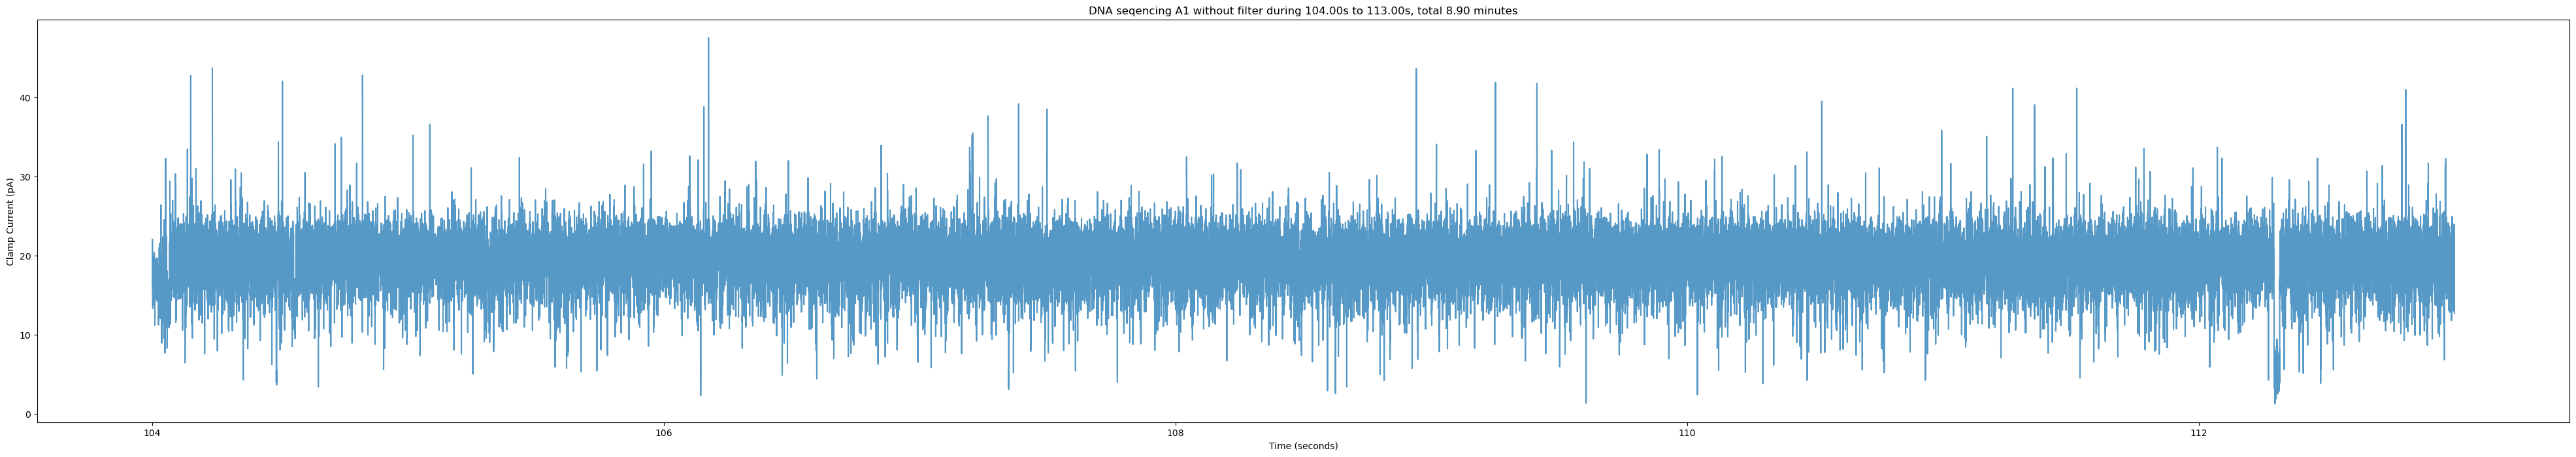

In [17]:
fig = plot_abf_result(abf,change_points,104,113,title_prefix="A1 without filter")


[24.686094, 24.37239, 24.898512, 23.24774, 21.548618, 13.866881, 15.182385, 17.182404, 17.082762, 16.37721, 16.379484, 17.29986, 17.065844, 17.47984, 16.978374, 16.914677, 16.43506, 16.807127, 16.657131, 18.923082, 17.93072, 17.153522, 17.175251, 17.00194, 16.834074, 16.929726, 17.374456, 16.82766, 16.4969, 17.028227, 17.020742, 16.255068, 17.08325, 17.113758, 18.227152, 16.499083, 18.356138, 17.374626, 13.176678, 13.387603, 16.980988, 17.411526, 17.961926, 19.447617, 20.884016, 20.247532, 14.669146, 13.828597, 13.456359, 17.30715, 18.075401, 18.585953, 20.066845, 20.111252, 19.005116, 20.439878, 21.82407, 20.353447, 18.415102, 19.937986, 18.269712, 19.849525, 19.324787, 19.449797, 19.793772, 19.85403, 20.108925, 19.8215, 19.742863, 19.50749, 19.448465, 18.793036, 20.33523, 18.531649, 17.971172, 18.43371, 19.993895, 20.663452, 19.915777, 19.750866, 17.377054, 17.955137, 19.014555, 20.4046, 18.9176, 18.453245, 22.409853, 19.301249, 18.361082, 18.475576, 19.311522, 19.576244, 18.685606, 

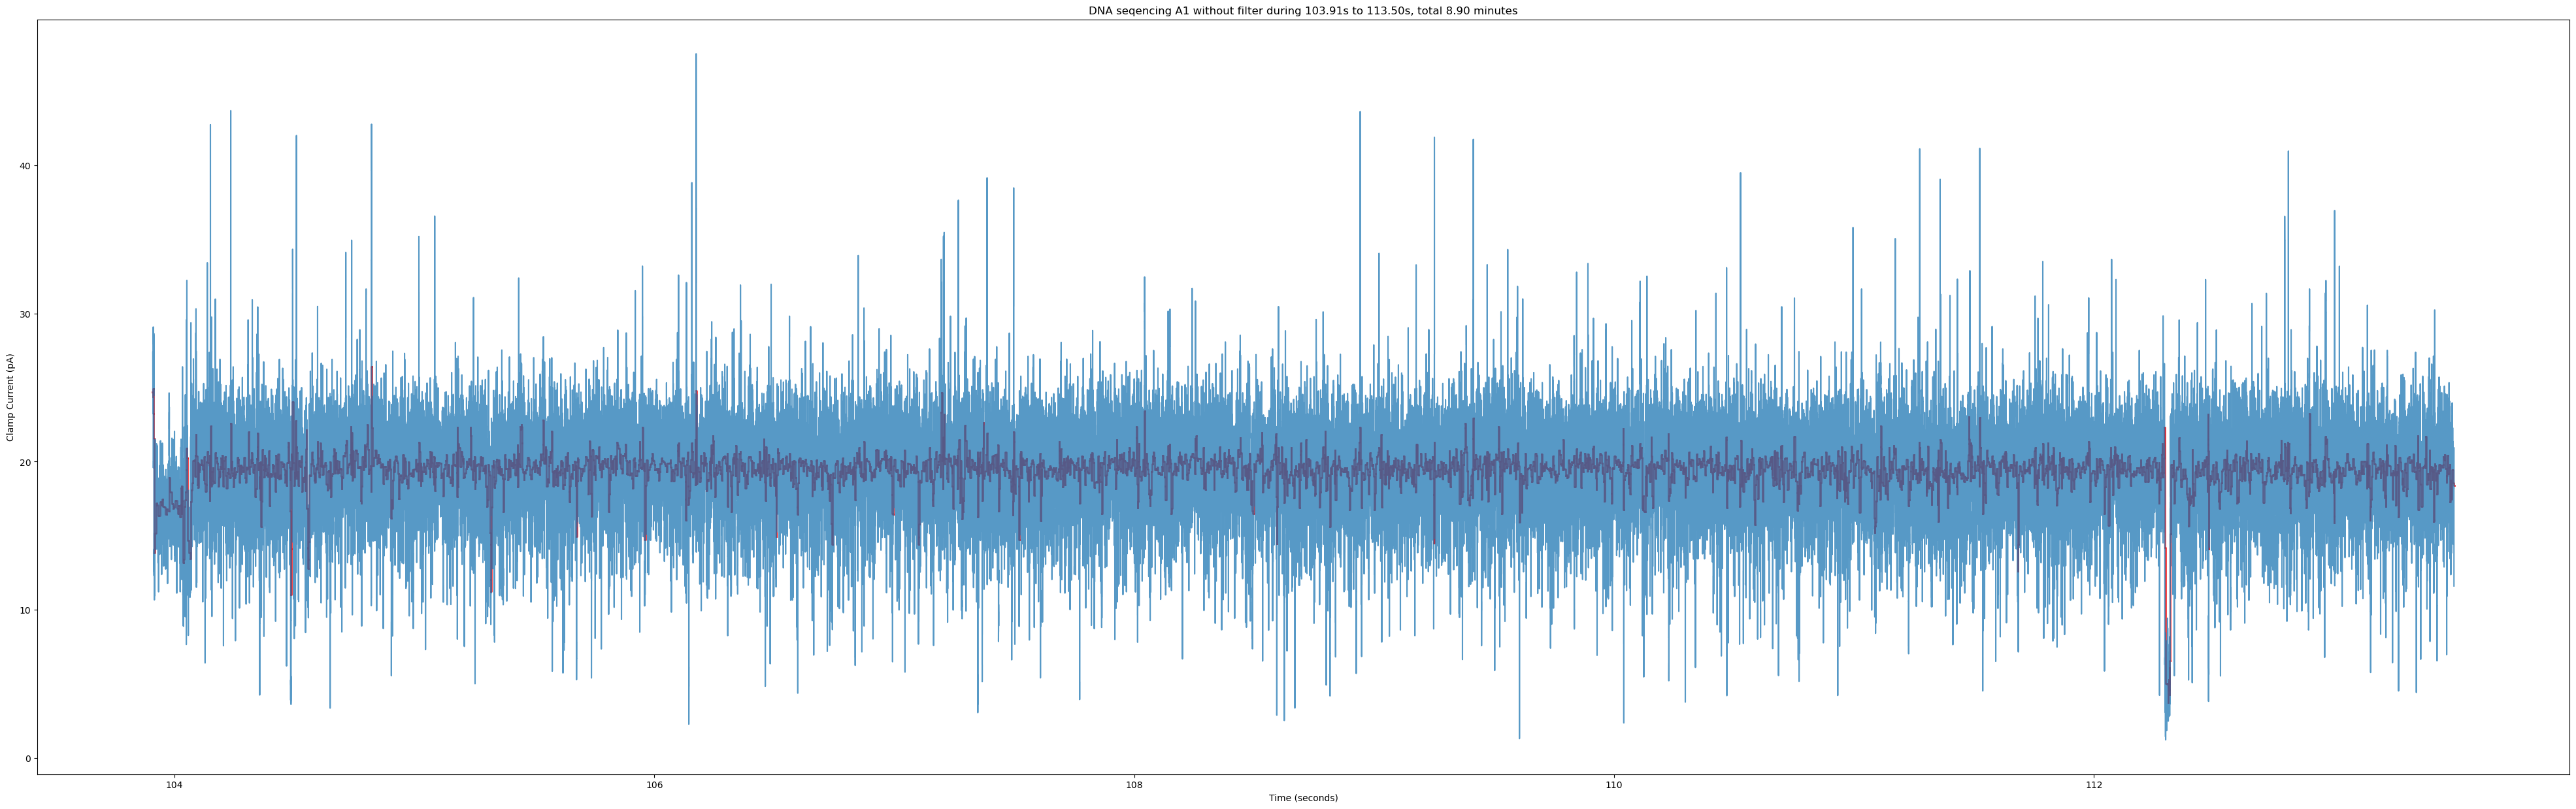

In [ ]:
fig = step_abf_result(abf,bkps,103.91,113.5,title_prefix="A1 without filter")

[24.686094, 24.37239, 24.898512, 23.24774, 21.548618, 13.866881, 15.182385, 17.182404, 17.082762, 16.37721, 16.379484, 17.29986, 17.065844, 17.47984, 16.978374, 16.914677, 16.43506, 16.807127, 16.657131, 18.923082, 17.93072, 17.153522, 17.175251, 17.00194, 16.834074, 16.929726, 17.374456, 16.82766, 16.4969, 17.028227, 17.020742, 16.255068, 17.08325, 17.113758, 18.227152, 16.499083, 18.356138, 17.374626, 13.176678, 13.387603, 16.980988, 17.411526, 17.961926, 19.447617, 20.884016, 20.247532, 14.669146, 13.828597, 13.456359, 17.30715, 18.075401, 18.585953, 20.066845, 20.111252, 19.005116, 20.439878, 21.82407, 20.353447, 18.415102, 19.937986, 18.269712, 19.849525, 19.324787, 19.449797, 19.793772, 19.85403, 20.108925, 19.8215, 19.742863, 19.50749, 19.448465, 18.793036, 20.33523, 18.531649, 17.971172, 18.43371, 19.993895, 20.663452, 19.915777, 19.750866, 17.377054, 17.955137, 19.014555, 20.4046, 18.9176, 18.453245, 22.409853, 19.301249, 18.361082, 18.475576, 19.311522, 19.576244, 18.685606, 

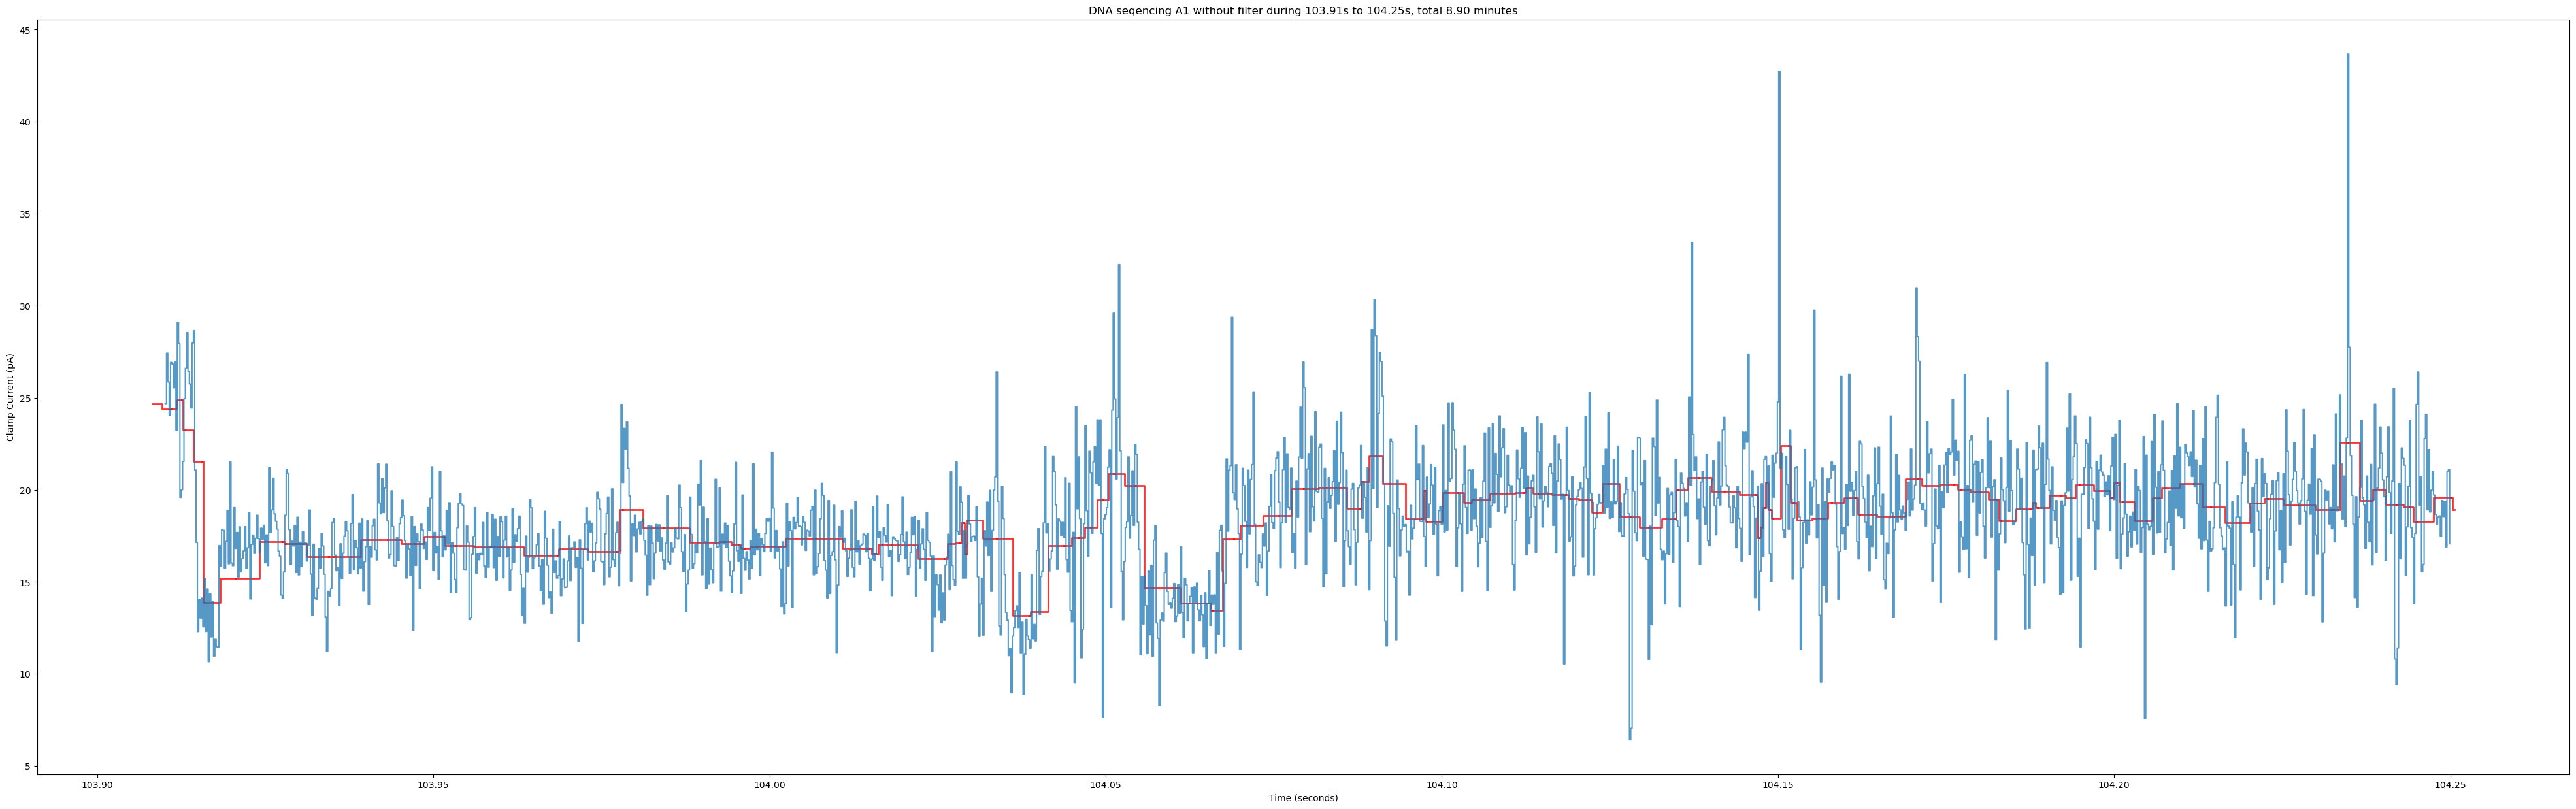

In [ ]:
fig = step_abf_result(abf,bkps,103.91,104.25,title_prefix="A1 without filter")

In [ ]:
in_total_bkps = [b + ranges[0][0] for b in result]
fig = plot_abf_result(abf,in_total_bkps,(ranges[0][0]+5)/5000,(ranges[0][1]-15)/5000,title_prefix="A1 without filter")

NameError: name 'result' is not defined

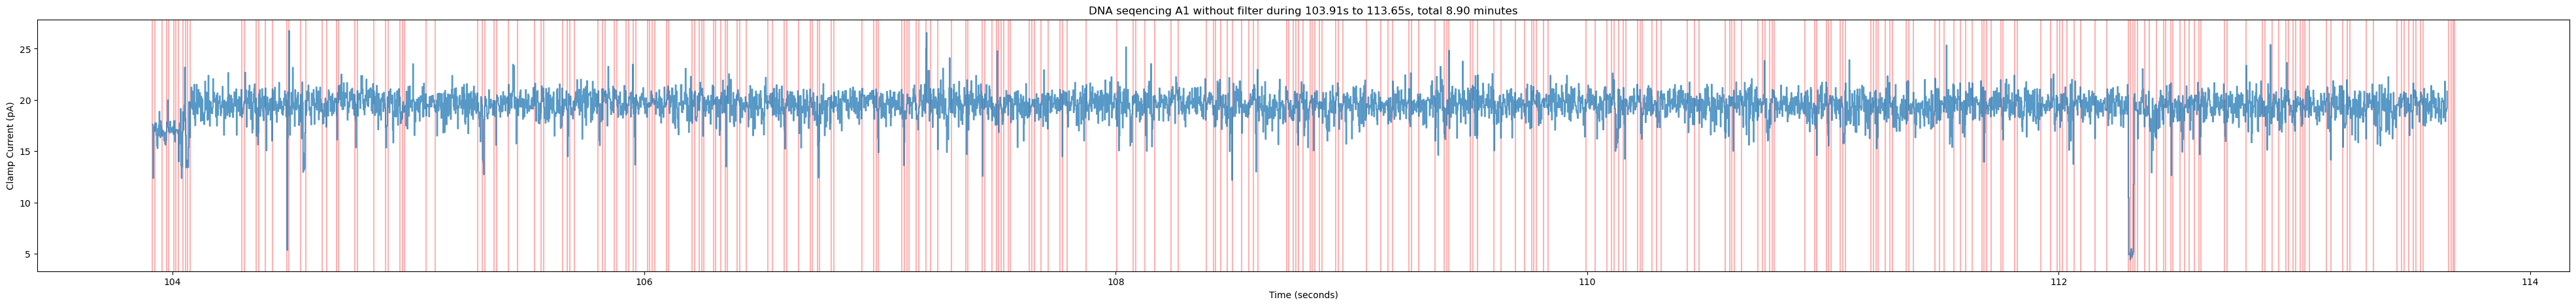

In [ ]:
in_total_bkps = [b + ranges[0][0] for b in result]
fig = plot_abf_result(abf,in_total_bkps,(ranges[0][0]+5)/5000,(ranges[0][1]-15)/5000,title_prefix="A1 without filter")

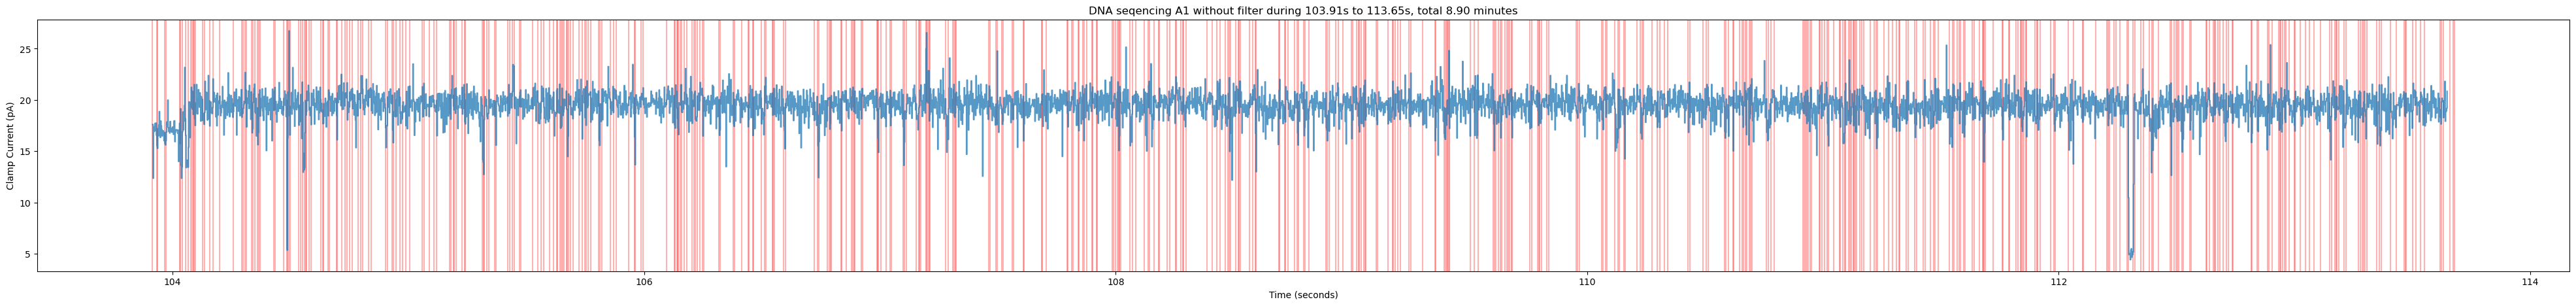

In [ ]:
algo_pelt = rpt.KernelCPD(kernel="rbf", min_size=2).fit(signal)
penalty_value = 1
result = algo_pelt.predict(pen=penalty_value)

in_total_bkps = [b + ranges[0][0] for b in result]
fig = plot_abf_result(abf,in_total_bkps,(ranges[0][0]+5)/5000,(ranges[0][1]-15)/5000,title_prefix="A1 without filter")

In [ ]:
len(result)

565

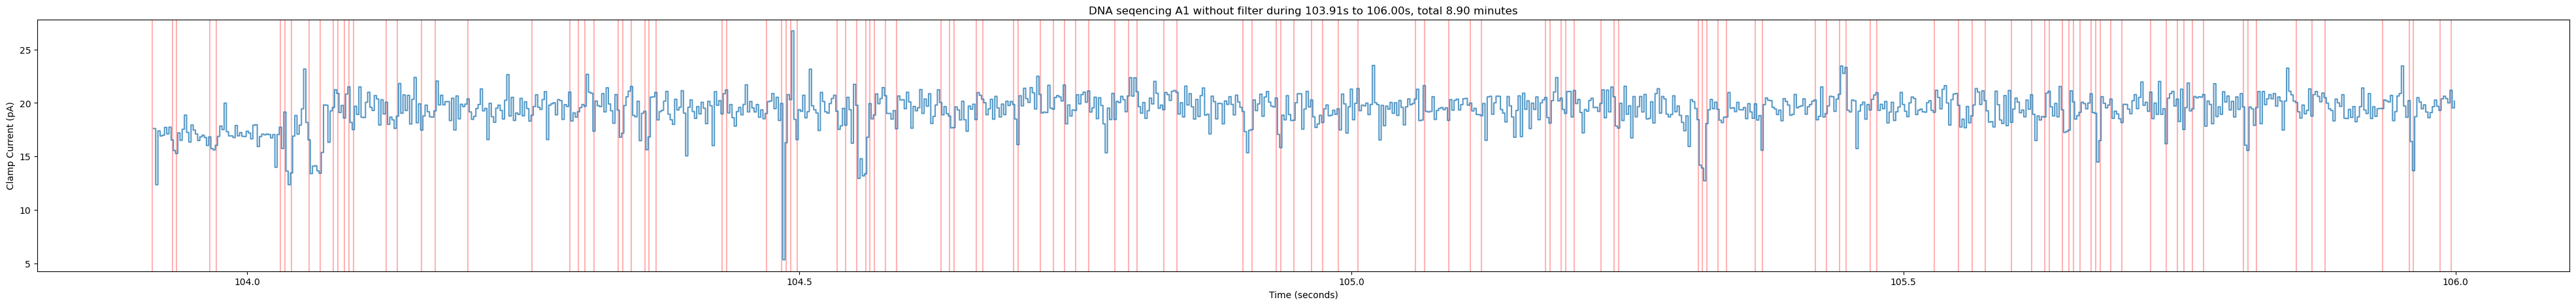

In [ ]:
adjust_result=[r for r in in_total_bkps if r < 106*5000]
fig = plot_abf_result(abf,adjust_result,(ranges[0][0]+5)/5000,106,title_prefix="A1 without filter")

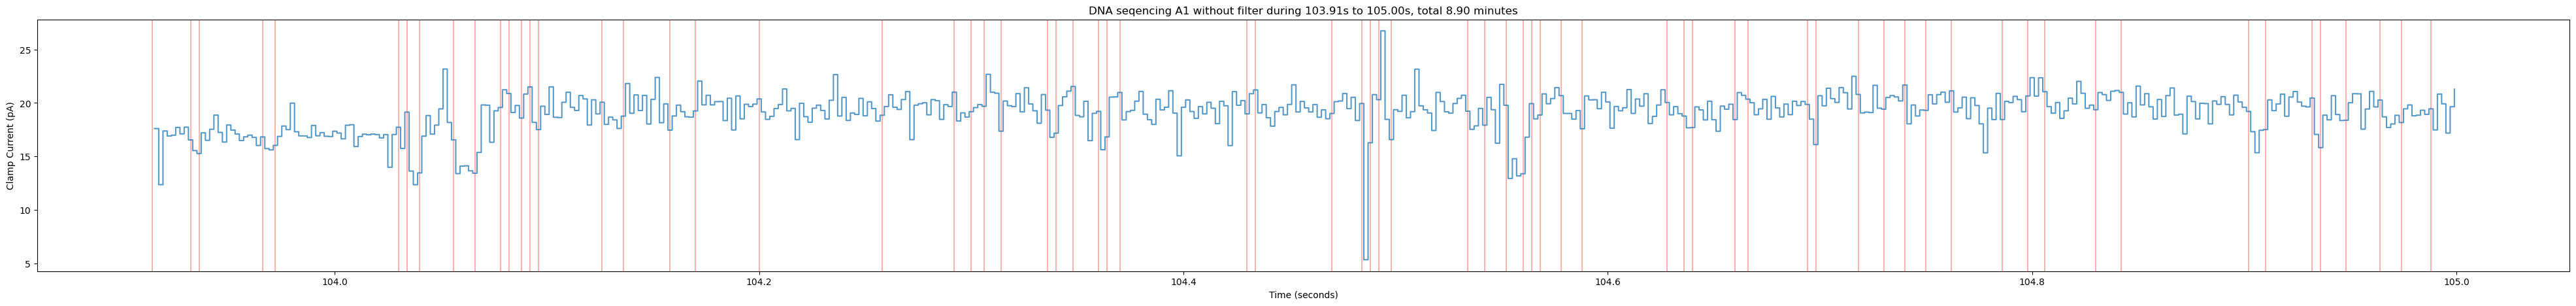

In [ ]:
adjust_result=[r for r in in_total_bkps if r < 105*5000]
fig = plot_abf_result(abf,adjust_result,(ranges[0][0]+5)/5000,105,title_prefix="A1 without filter")

In [ ]:
from level_finder import level_finder
abf = preprocess(abf_A1)
change_points=level_finder(abf_A1)
print(change_points)

NameError: name 'preprocess' is not defined